In [33]:
import argparse
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import random
import seaborn as sns
import json
import collections
import statistics

In [36]:
# Randomly sample n files and return their names
def random_sample(n=1, directory='/local/juro4948/data/egoexo4d/preprocessed_old/annotations/gravit-groundTruth'):
    # Get all file paths for files in the directory
    files = [os.path.join(directory, file) for file in os.listdir(directory)]
    # Print the total number of files
    print(f'Total files: {len(files)}')
    # Randomly sample n files
    sample = random.sample(files, n)
    return sample

In [37]:
randomlist = random_sample(343)
print(randomlist)

Total files: 343
['/local/juro4948/data/egoexo4d/preprocessed_old/annotations/gravit-groundTruth/upenn_0711_Cooking_2_3.txt', '/local/juro4948/data/egoexo4d/preprocessed_old/annotations/gravit-groundTruth/nus_cooking_17_5.txt', '/local/juro4948/data/egoexo4d/preprocessed_old/annotations/gravit-groundTruth/indiana_cooking_09_2.txt', '/local/juro4948/data/egoexo4d/preprocessed_old/annotations/gravit-groundTruth/iiith_cooking_112_2.txt', '/local/juro4948/data/egoexo4d/preprocessed_old/annotations/gravit-groundTruth/sfu_cooking028_12.txt', '/local/juro4948/data/egoexo4d/preprocessed_old/annotations/gravit-groundTruth/georgiatech_cooking_11_02_3.txt', '/local/juro4948/data/egoexo4d/preprocessed_old/annotations/gravit-groundTruth/upenn_0628_Cooking_1_2.txt', '/local/juro4948/data/egoexo4d/preprocessed_old/annotations/gravit-groundTruth/uniandes_cooking_007_8.txt', '/local/juro4948/data/egoexo4d/preprocessed_old/annotations/gravit-groundTruth/sfu_cooking020_2.txt', '/local/juro4948/data/egoex

In [13]:
def number_of_unique_actions(sample=None):
    # compute the distribution of number of unique actions in each video
    unique_actions = {}
    # Loop through each file in the sample
    for file in sample:
        with open(file, 'r') as f:
            # Read the lines in the file
            lines = f.readlines()
            
            # Get the unique actions in the file
            actions = set(lines)
            
            # Add the count of unique actions to the dictionary
            unique_actions[file] = len(actions)
    
    # Compute the distribution statistics
    counts = list(unique_actions.values())
    mean = statistics.mean(counts)
    median = statistics.median(counts)
    stdev = statistics.stdev(counts) if len(counts) > 1 else 0
    min_count = min(counts)
    max_count = max(counts)
    iqr = statistics.quantiles(counts, n=4)[2] - statistics.quantiles(counts, n=4)[0]

    print(f'Mean: {mean}')
    print(f'Median: {median}')
    print(f'Standard Deviation: {stdev}')
    print(f'Min: {min_count}')
    print(f'Max: {max_count}')
    print(f'IQR: {iqr}')

    # Create a histogram of the number of unique actions
    bins = np.arange(min(unique_actions.values()), max(unique_actions.values()) + 1, 5)  # Create bins of size 5
    plt.hist(unique_actions.values(), bins=bins, alpha=0.7, edgecolor='black')
    plt.title('Unique Actions in Each Video')
    plt.xlabel('Number of Unique Actions in Each Video')
    plt.ylabel('Frequency')
    plt.show()

    # Return the dictionary of unique actions
    return unique_actions

Mean: 22.333333333333332
Median: 25
Standard Deviation: 10.263202878893768
Min: 11
Max: 31
IQR: 20.0


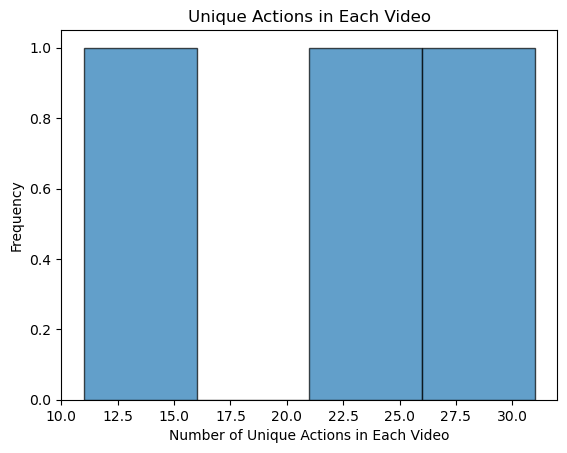

{'/local/juro4948/data/egoexo4d/preprocessed_old/annotations/gravit-groundTruth/uniandes_cooking_001_3.txt': 11, '/local/juro4948/data/egoexo4d/preprocessed_old/annotations/gravit-groundTruth/uniandes_cooking_004_6.txt': 31, '/local/juro4948/data/egoexo4d/preprocessed_old/annotations/gravit-groundTruth/sfu_cooking_009_7.txt': 25}


In [14]:
actions = number_of_unique_actions(randomlist)
print(actions)

In [15]:
def proportion_of_actions(sample, plot_bounds=[0.95, 1]):
    # Initialize a Counter object
    action_counts = collections.Counter()

    # Loop through each file in the sample
    for file in sample:
        with open(file, 'r') as f:
            # Read the lines in the file
            lines = f.readlines()
            
            # Update the action_counts with actions from the current file
            action_counts.update(lines)

    # Compute the total number of actions
    total_actions = sum(action_counts.values())

    # Compute the proportion of each action instance out of all instances
    action_proportions = {action: count / total_actions for action, count in action_counts.items()}

    # Sort actions by proportion
    sorted_actions = sorted(action_proportions.items(), key=lambda item: item[1])

    # Determine the actions to plot based on plot_bounds
    lower_bound_index = int(plot_bounds[0] * len(sorted_actions))
    upper_bound_index = int(plot_bounds[1] * len(sorted_actions))
    actions_to_plot = sorted_actions[lower_bound_index:upper_bound_index]

    # Separate the actions and their proportions
    action_names, proportions = zip(*actions_to_plot)

    # Create a bar plot of the proportions
    plt.figure(figsize=(20, 10))
    plt.bar(action_names, proportions)
    plt.xlabel('Action')
    plt.ylabel('Proportion')
    plt.title('Proportion of Actions')
    plt.xticks(rotation=90)  # Rotate x-axis labels for readability
    #plt.xticks(['' for _ in action_names]) # Uncomment this line and comment line above to remove bar labels
    plt.show()

    # Return the dictionary of action proportions
    return action_proportions


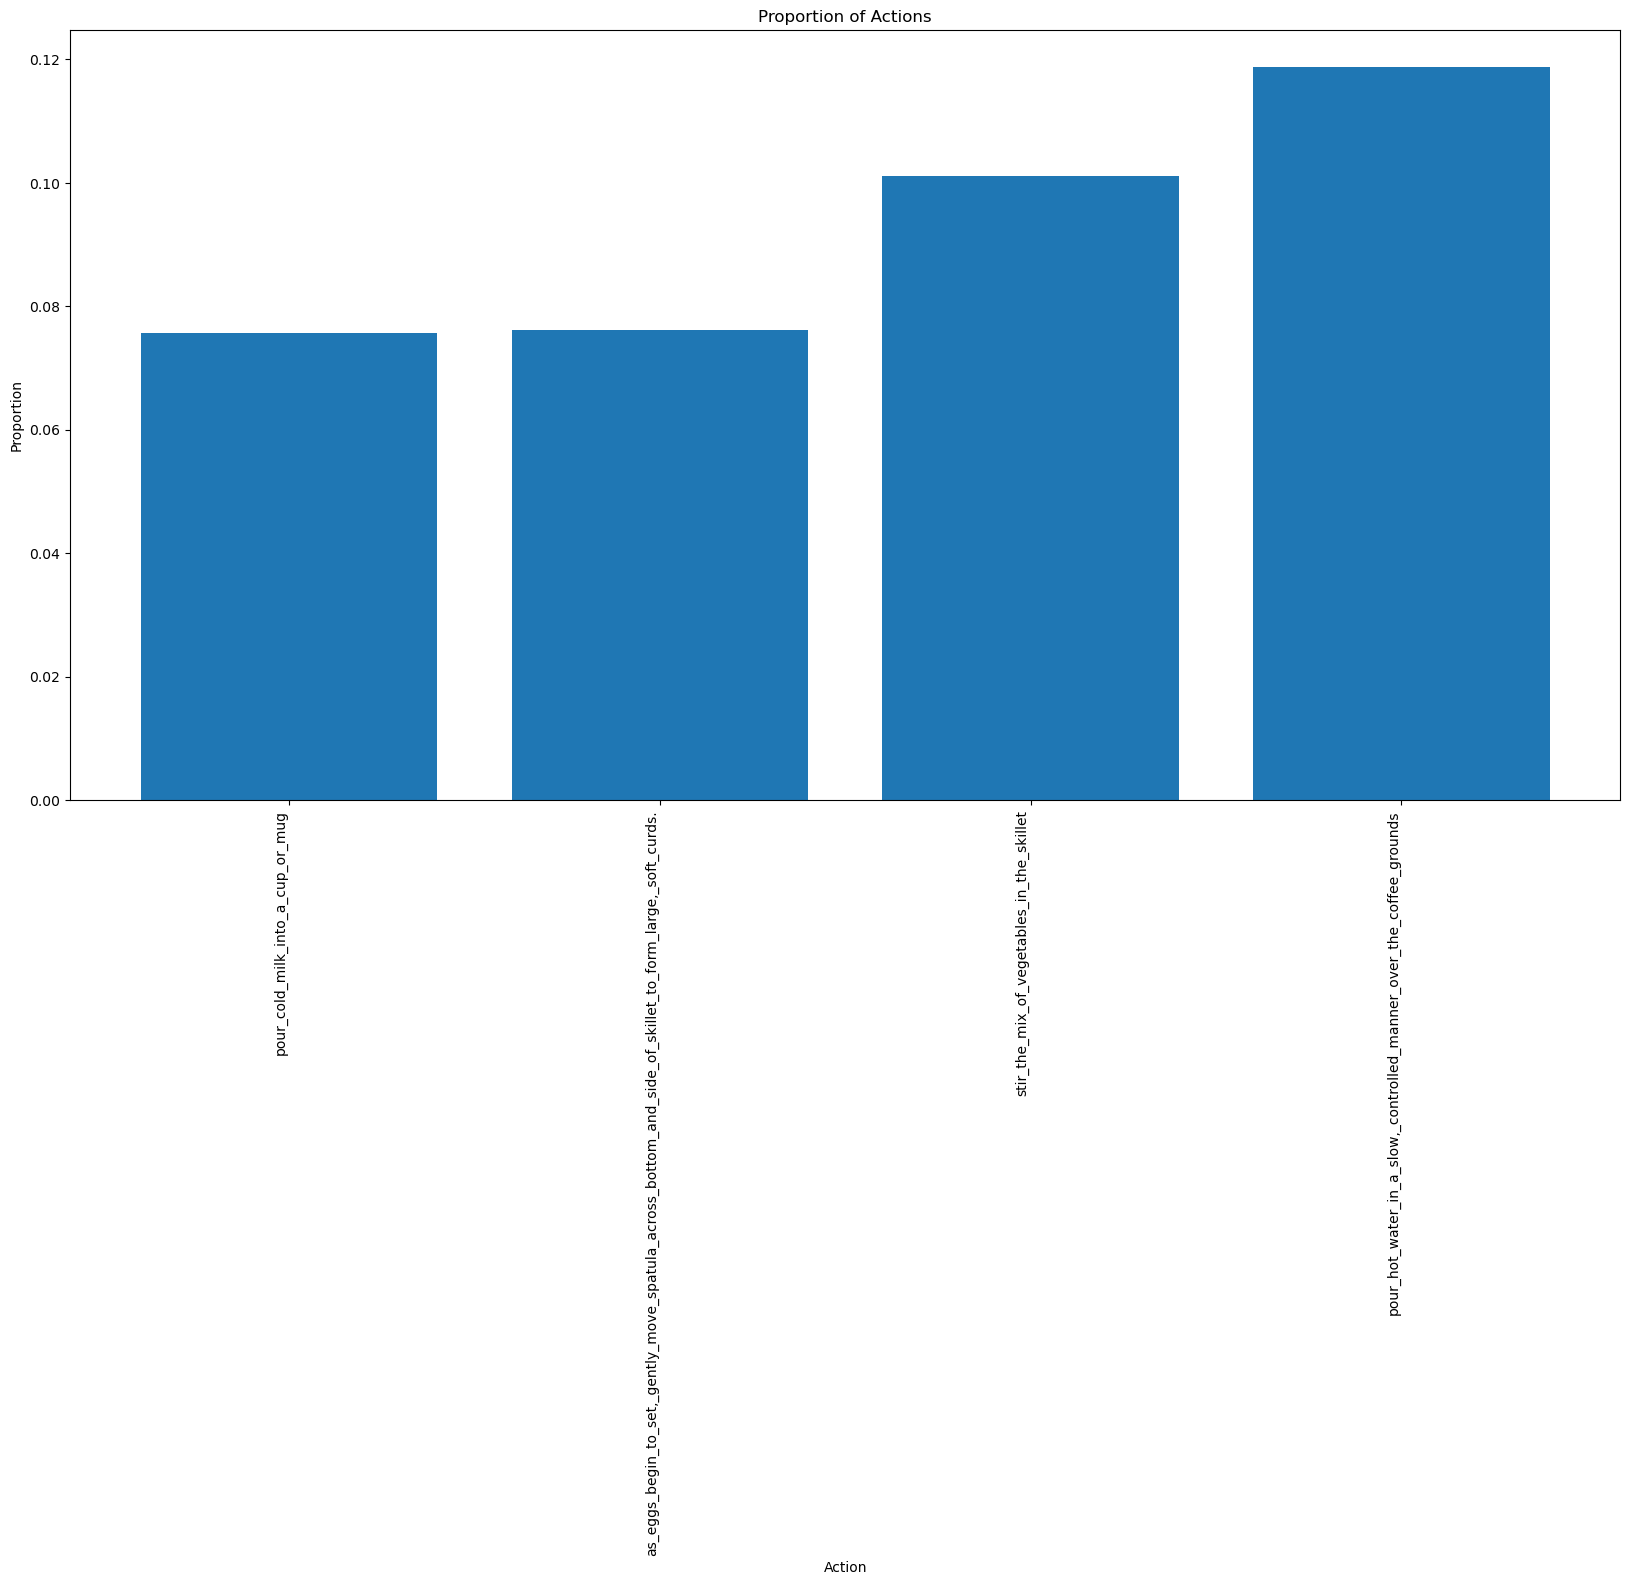

{'action_start\n': 0.003820358264708379,
 'fill_an_electric_kettle_with_water\n': 0.009338653535953817,
 'turn_on_the_electric_kettle\n': 0.003452471913292017,
 'pour_coffee_beans_into_the_grinder\n': 0.014404165605456038,
 'operate_the_grinder\n': 0.01887539972267029,
 'place_a_coffee_filter_in_the_designated_basket\n': 0.0147720519568724,
 'add_the_coffee_grounds_to_the_filter_in_the_pour-over_device.\n': 0.014602258256218694,
 'pour_cold_milk_into_a_cup_or_mug\n': 0.0756996915414438,
 'pour_hot_water_in_a_slow,_controlled_manner_over_the_coffee_grounds\n': 0.11879899255737612,
 'add_cold_milk\n': 0.006367263774513966,
 'action_end\n': 0.06138042278631463,
 'get_tomato\n': 0.004159945666015791,
 'get_skillet_or_frying_pan_or_wok\n': 0.004952316269066418,
 'cut_tomato\n': 0.06811557291224496,
 'turn_off_the_stove\n': 0.013272207601097999,
 'check_heat_of_the_skillet\n': 0.0069898406769108865,
 'adjust_the_stove_heat\n': 0.03506239918499024,
 'get_oil\n': 0.002094122308062371,
 'add_oi

In [16]:
proportion_of_actions(randomlist)

In [101]:
# This function computes the time of each action within each video and returns a list of action durations for each video.

def action_durations_of_videos(sample=None, fps=30):
    # Initialize a dictionary to store action durations for each video
    video_actions = {}

    # Loop through each file in the sample
    for file in sample:
        with open(file, 'r') as f:
            # Read the lines in the file, each line is one frame
            lines = f.readlines()
            # Initialize variables to track the current action and its duration
            current_action = None
            action_start_frame = 0
            previous_action = None

            # Loop through each frame in the video
            for frame, line in enumerate(lines):
                action = line.strip()  # For now, let's assume the action is the content of the frame

                if action != current_action:
                    if current_action is not None:
                        # Calculate duration of previous action
                        duration = (frame - action_start_frame) / fps
                        # Add action duration to the dictionary
                        video_actions.setdefault(file, {}).setdefault(previous_action, []).append(duration)
                    # Update current action and start frame for the new action
                    current_action = action
                    action_start_frame = frame
                    previous_action = current_action

            # Calculate duration of the last action
            duration = (len(lines) - action_start_frame) / fps
            # Add last action duration to the dictionary
            video_actions.setdefault(file, {}).setdefault(current_action, []).append(duration)

    return video_actions



In [102]:
action_durations_of_videos(randomlist)

{'/local/juro4948/data/egoexo4d/preprocessed_old/annotations/gravit-groundTruth/upenn_0711_Cooking_2_3.txt': {'action_start': [29.433333333333334],
  'get_cucumber': [5.833333333333333],
  'get_tomato': [15.333333333333334, 25.233333333333334],
  'wash_cucumber': [10.9],
  'cut_cucumber': [46.86666666666667],
  'cut_tomato': [52.3],
  'get_a_bowl': [6.4],
  'add_a_mix_of_ingredients_to_a_bowl': [13.3],
  'get_rice_vinegar': [1.9],
  'add_vinegar': [32.9, 22.4],
  'get_vinegar': [6.6],
  'stir_the_salad_mixture': [9.1, 29.533333333333335],
  'get_soy_sauce': [2.2666666666666666],
  'add_soy_sauce': [7.1],
  'wash_hands': [4.8],
  'action_end': [1.0]},
 '/local/juro4948/data/egoexo4d/preprocessed_old/annotations/gravit-groundTruth/nus_cooking_17_5.txt': {'get_a_cup_or_mug': [1.5666666666666667],
  'turn_on_the_stove': [16.733333333333334],
  'get_tea_bag': [2.8666666666666667],
  'cut_tea_bag': [1.8],
  'throw_out_trash_or_waste': [1.1333333333333333, 1.5666666666666667],
  'add_tea_bags

In [76]:
import matplotlib.pyplot as plt

def time_duration_of_videos(sample=None, fps=30):
    # Initialize a video list
    videos = {}
    total_duration = 0  # Initialize total duration counter
    num_videos = len(sample)  # Get the total number of videos
    # Loop through each file in the sample
    for file in sample:
        with open(file, 'r') as f:
            # Read the lines in the file, each line is one frame
            lines = f.readlines()
            # Get total number of lines in the file
            total_lines = len(lines)
            # Compute video length in seconds by dividing number of lines by frame rate
            video_length = total_lines / fps
            total_duration += video_length  # Add video length to total duration
            # Add file to videos list [file_name, videoLength]
            videos[file] = video_length
    # Calculate the average video length
    average_duration = total_duration / num_videos

    # Convert durations from seconds to minutes
    durations_minutes = [duration / 60 for duration in videos.values()]

    # Create a histogram of the video durations in minutes
    plt.hist(durations_minutes, bins=60, edgecolor='black')
    plt.title('Histogram of Video Durations')
    plt.xlabel('Duration (minutes)')
    plt.ylabel('Frequency')
    # Add the average video length as a caption on the histogram
    plt.text(0.95, 0.95, f'Average Video Length: {(average_duration / 60):.2f} minutes', 
             verticalalignment='top', horizontalalignment='right', 
             transform=plt.gca().transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.5))
    plt.show()

    # Return the dictionary of video durations
    return videos


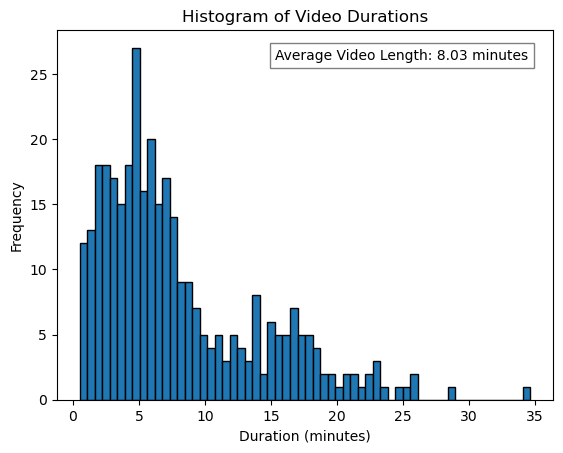

In [77]:
videoDurations = time_duration_of_videos(randomlist)

In [63]:
def get_longest_action_strings(sample=None, n=20, print_longest=True):
    # List to store the longest action strings
    longest = []

    # Loop through each file in the sample
    for file in sample:
        with open(file, 'r') as f:
            # Read the lines in the file
            lines = f.readlines()

            # Get the unique actions in the file
            actions = set(lines)

            # Find the longest n strings in the current file
            longest.extend(sorted(actions, key=len, reverse=True))

    # Trim longest to length of n
    longest = longest[:n]

    # Print the longest n strings if required
    if print_longest:
        print(f"Top {n} Longest Action Strings:")
        for i, action in enumerate(longest, start=1):
            print(f"{i}. {action}")

    return longest


In [65]:
longest_actions = get_longest_action_strings(randomlist)

Top 20 Longest Action Strings:
1. add_a_mix_of_ingredients_to_a_bowl

2. stir_the_salad_mixture

3. get_rice_vinegar

4. get_soy_sauce

5. wash_cucumber

6. add_soy_sauce

7. action_start

8. cut_cucumber

9. get_cucumber

10. get_vinegar

11. add_vinegar

12. cut_tomato

13. get_a_bowl

14. wash_hands

15. get_tomato

16. action_end

17. stir_milk_with_a_spoon_to_mix_well_with_water_and_tea

18. pour_hot_water_to_a_cup_or_mug

19. add_tea_bags_to_hot_water

20. throw_out_trash_or_waste



In [50]:
# To use this function, make sure you have conda activated and install the wordcloud package with the following command
# conda install -c conda-forge wordcloud
from wordcloud import WordCloud

def word_cloud_of_actions(sample=None):
    # Initialize a string to store all actions
    all_actions = ''

    # Loop through each file in the sample
    for file in sample:
        with open(file, 'r') as f:
            # Read the lines in the file
            lines = f.readlines()
            
            # Strip newline characters and add the actions from the current file to all_actions
            for line in lines:
                all_actions += line
    words = all_actions.split()
    random.shuffle(words) # shuffle words to create single word instances
    shuffled_actions = ' '.join(words)  # Join the shuffled words back into a string
    # Create a word cloud
    wordcloud = WordCloud(width = 1600, height = 1600,  # Increase the size of the word cloud
                          background_color ='black', 
                          stopwords = 'action_end' # Add words that you do not want to visualize
                          ).generate(shuffled_actions)  # Pass the shuffled string

    # Plot the word cloud                      
    plt.figure(figsize = (10, 10), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show()


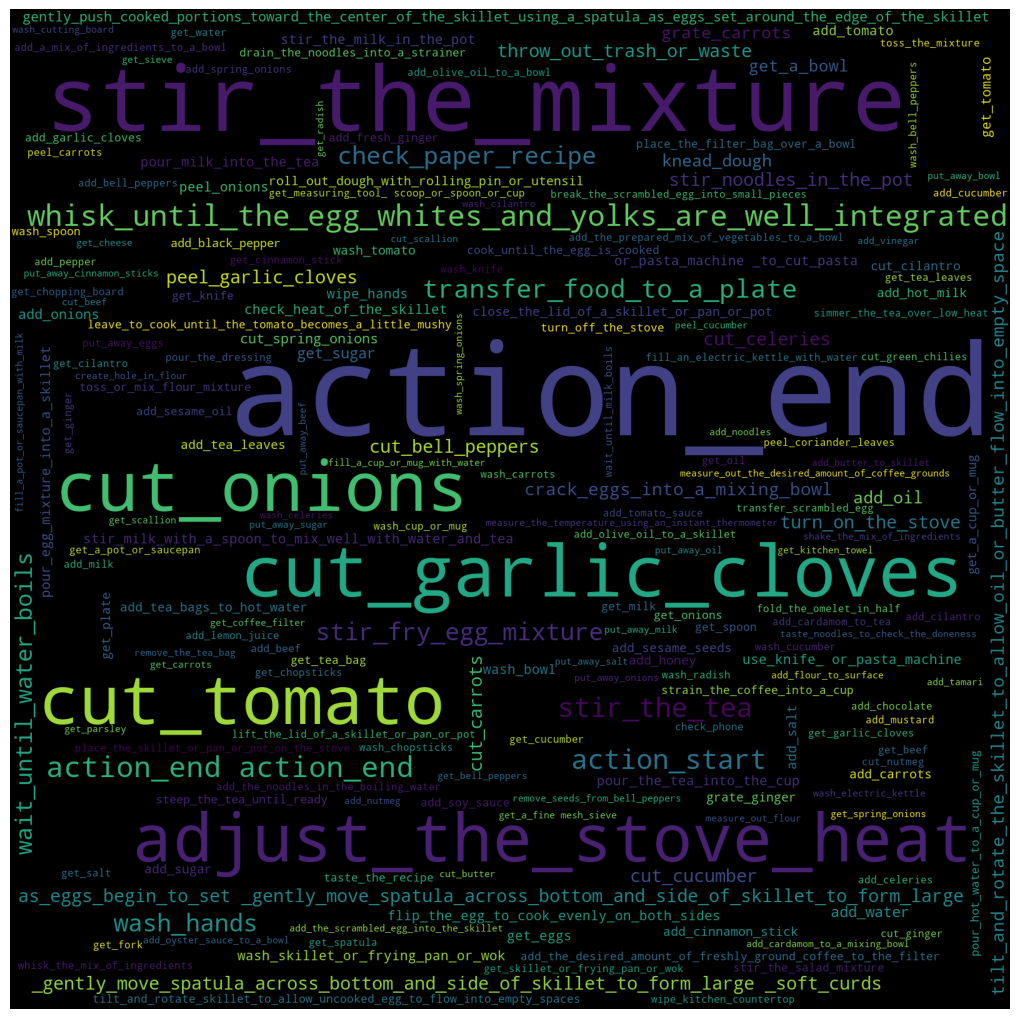

In [13]:
word_cloud_of_actions(randomlist)

In [14]:
# To use this function, activate conda and install the wordcloud package with the following command
# conda install -c conda-forge wordcloud

from wordcloud import WordCloud
from matplotlib import cm

def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    r, g, b, _ = cm.viridis_r(font_size / 100)  # Get color from colormap
    return int(r * 255), int(g * 255), int(b * 255)  # Convert to RGB and scale to [0, 255]


def word_cloud_of_actions(sample=None):
    # Initialize a string to store all actions
    all_actions = ''

    # Loop through each file in the sample
    for file in sample:
        with open(file, 'r') as f:
            # Read the lines in the file
            lines = f.readlines()
            
            # Strip newline characters and add the actions from the current file to all_actions
            for line in lines:
                all_actions += line
    words = all_actions.split()
    random.shuffle(words) # shuffle words to create single word instances
    shuffled_actions = ' '.join(words)  # Join the shuffled words back into a string
    # Create a word cloud
    wordcloud = WordCloud(width = 1600, height = 1600,  # Increase the size of the word cloud
                          background_color ='black', 
                          stopwords = 'action_end', # Add words that you do not want to visualize
                          color_func=color_func  # Use custom color
                          ).generate(shuffled_actions)  # Pass the shuffled string

    # Plot the word cloud                      
    plt.figure(figsize = (10, 10), facecolor = None) 
    plt.imshow(wordcloud, interpolation='bilinear') 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show()


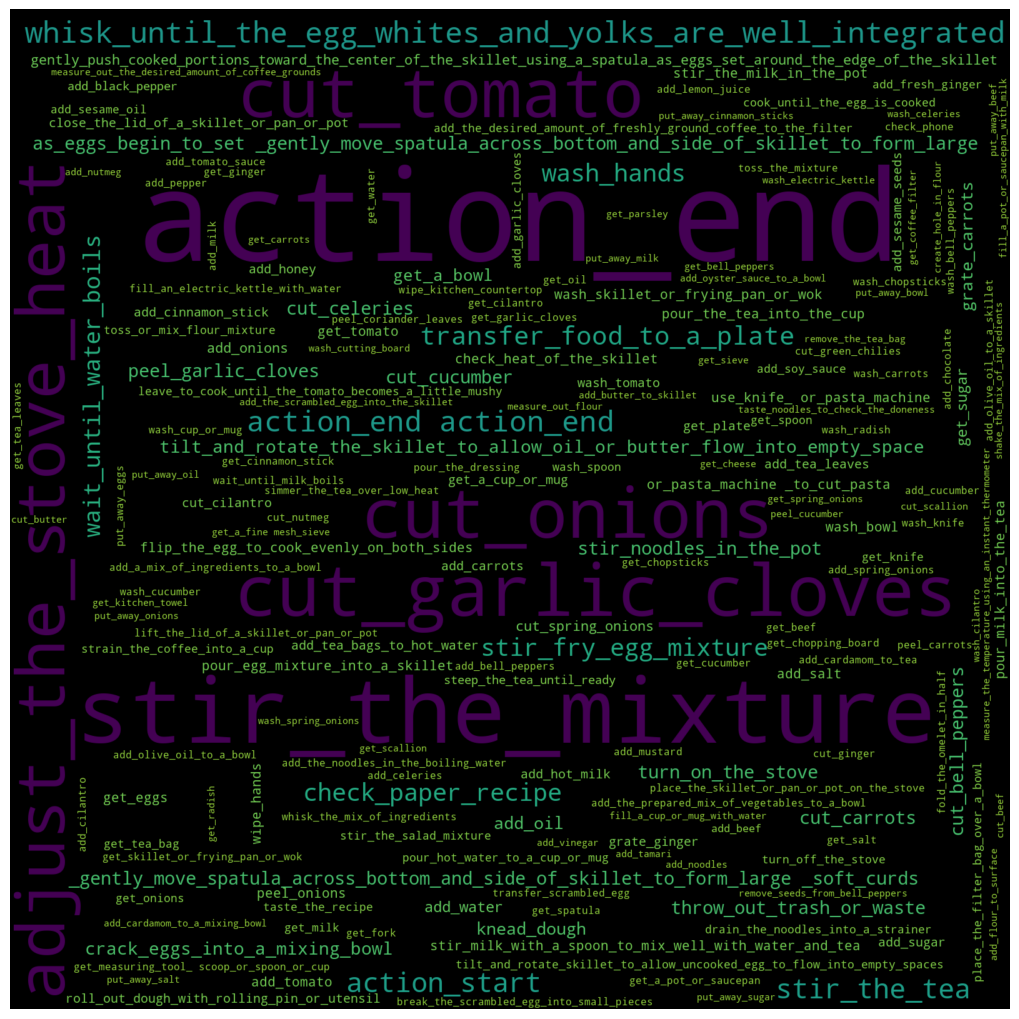

In [246]:
word_cloud_of_actions(randomlist)